In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import sys
sys.path.append('../code/python')
from mpl_settings_v3 import *
from metodos import Q2_per

In [7]:
def solv(h, k, a, b, f, Qi=Q2_per, verbose=False):
    
    X = np.arange(-1, 1, h)
    time = np.arange(a, b, k)
    steps = time.size
    
    v = np.zeros((N, time.size))
    print(v.shape)
    v[:,0] = f(X)
    t = a
    for n, t in enumerate(time[:-1]):
        if verbose:
            count = int((10*n)/steps)
            reminder = (10*n)%steps
            if(reminder == 0):
                print(count)
        
        vn = v[:,n]
        v[:,n+1] = vn + k * Qi(vn, h)

    return time, X, v

In [8]:
def f(x, r):
    return np.fabs(np.sin(np.pi*x/2))**r
N = 40
h = 2/N
k = 0.1*h**2
t0 = 0
T = 100
steps = int((T - t0)*(int(1/k)+1))
print('h = {:.6} (N = {:d})'.format(h, N))
print('k = {:.6} (steps = {:d})'.format(k, steps))

X = np.linspace(-1, 1, N+1)
r_values = [1, 3, 5]
times = {}
Xs = {}
vs = {}
for r in r_values:
    time, X, v = solv(h, k, t0, T, lambda x: f(x, r))
    times[r] = time
    Xs[r] = X
    vs[r] = v

h = 0.05 (N = 40)
k = 0.00025 (steps = 400000)
(40, 400000)
(40, 400000)
(40, 400000)


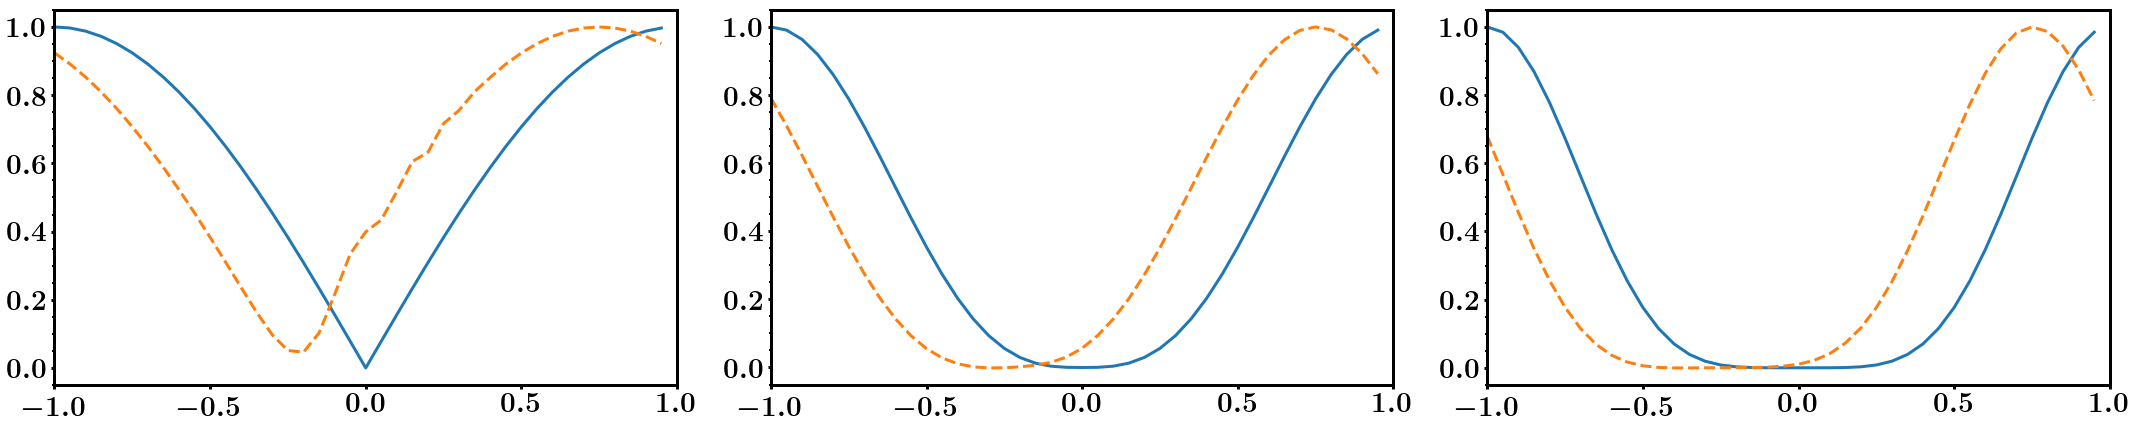

In [9]:
ncols = 3
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, r in enumerate(r_values):
    ax = axes[i]
    X = Xs[r]
    v = vs[r]
    ax.set_xlim(-1, 1)
    ax.plot(X, f(X, r))
    ax.plot(X, v[:,-1], '--')


plt.tight_layout()
plt.show()

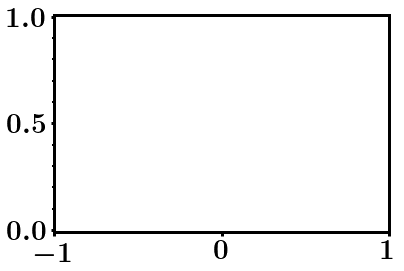

In [10]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-1, 1))
#ax.set_ylim((-10, 10))
ax.set_ylim((-0.01, 1.01))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    #x = np.linspace(0, 2, 1000)
    #y = np.sin(2 * np.pi * (x - 0.01 * i))
    x = Xs[1]
    y = vs[1][:,499*i]
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

#HTML(anim.to_html5_video())

rc('animation', html='html5')

In [11]:
anim